In [2]:
#Credit Card Fraud Detection model using xgboost and bagging
#Unbalanced data hence using SMOTE to balance
#Source: https://github.com/IBM/xgboost-smote-detect-fraud/blob/master/notebook/Fraud_Detection.ipynb
#Database of Credit Card fraud from Kaggle https://www.kaggle.com/mlg-ulb/creditcardfraud/data

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_data_2=pd.read_csv("creditcard.csv")
'''Rename the dataframe to df'''
df = df_data_2

print("Time")
print(df.Time.describe())
print("V1")
print(df.Time.describe())
print("Amount")
print(df.Amount.describe())
print("Class")
print(df.Class.describe())
print(df.Class.nunique())
print("ALL")
print(df.describe())

Time
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
V1
count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64
Amount
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64
Class
count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64
2
ALL
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+

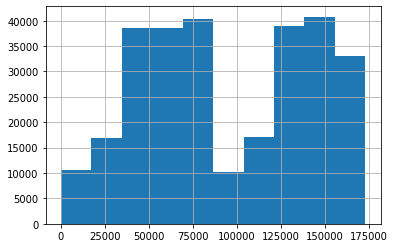

In [3]:
df.Time.hist()

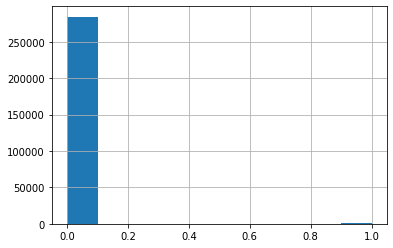

In [4]:
df.Class.hist()

In [ ]:
#As clear from above ovewhelming number of target variable is genuine transactions ie. 284,315
#Fraud tranasctions are only 492. This unbalances sample data too much & hence prediction accuracy reduces
#So we need to balance data using SMOTE algorithm

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117890130>,
      dtype=object)

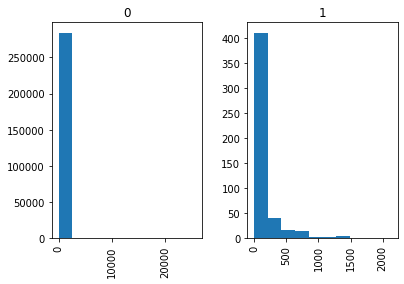

In [5]:
df['Amount'].hist(by=df['Class'])

In [7]:
#Check for imbalance of data grouped by class ie. size of target variable of Genuine transaction vs Fraud 
print(df.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1187a7df0>,
      dtype=object)

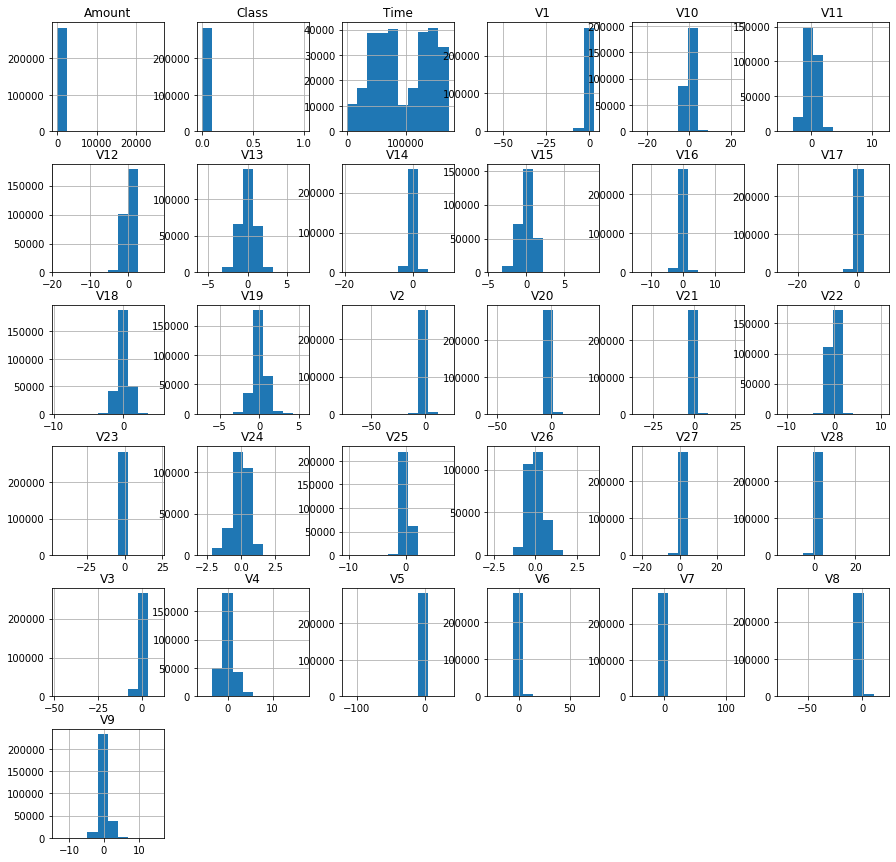

In [10]:
#Check similar distriutions for all variables
df.hist(figsize=(15,15))

V9 - V10


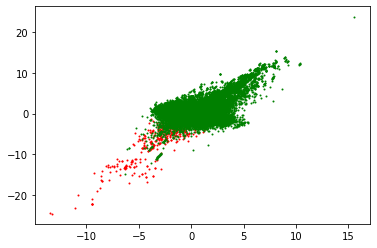

<Figure size 432x288 with 0 Axes>

In [12]:
#Check the spread of fraud vs non-fraud on selected variables
#This is done to identify variables selection which has good spread of frauds and non frauds
#Check spread of fraud across transactions
sample = df[df['Class']==0]
fraud = df[df['Class']==1]
print('V9 - V10')
plt.scatter(fraud['V9'], fraud['V10'],s=1, color='r')
plt.scatter(sample['V9'], sample['V10'], s=1, color='g')
plt.show()
plt.clf()

V16-V17


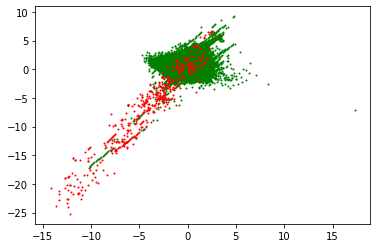

V17 - V18


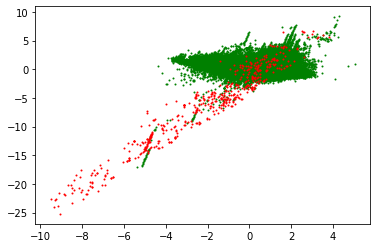

V1 - V3


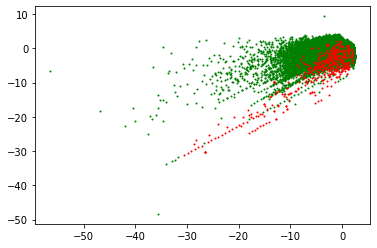

V1 - V2


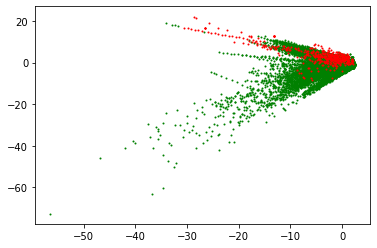

<Figure size 432x288 with 0 Axes>

In [17]:
print('V16-V17')
plt.scatter(sample['V16'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V16'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

print('V17 - V18')
plt.scatter(sample['V18'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V18'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

print('V1 - V3')
plt.scatter(sample['V1'], sample['V3'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V3'], s=1, color = 'r')
plt.show()
plt.clf()

print('V1 - V2')
plt.scatter(sample['V1'], sample['V2'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V2'], s=1, color = 'r')
plt.show()
plt.clf()

In [18]:
#Split the data into train & test data sets using 70:30 mix
#The model will be built on training data and will be applied on the test data
# Split The Data with all variables

from sklearn.model_selection import train_test_split

x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(199364, 30)
xtest shape
(85443, 30)


In [19]:
'''Use Random Forest Algorithm
#A brief about Random Forest Algorithm
#Random forest classifier creates a set of decision trees from randomly selected subset of training set. 
#It then aggregates the votes from different decision trees to decide the final class of the test object. 
#Random forests or random decision forests are an ensemble learning method for classification, regression and 
#other tasks, that operate by constructing a multitude of decision trees at training time and outputting the 
#class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 
#Random decision forests will avoid overfitting which will enhance the accuracy of the model on new data. 
#This is a Bagging based algorithm which is used for reducing Overfitting in order to create strong learners 
#for generating accurate predictions.'''

# RF Classifier explained
'''rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=4)
n_estimators : integer, optional (default=10)
The number of trees in the forest.
oob_score : bool (default=False)
Whether to use out-of-bag samples to estimate the generalization accuracy.
n_jobs : integer, optional (default=1)
The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.
'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
confusion matrix
[[85290     6]
 [   36   111]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy : 0.999508
Area under the curve : 0.87751

In [20]:
# GBM Classifier explained

'''params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5, 'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble. GradientBoostingClassifier(**params)
n_estimators : int (default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting, so a large number usually results in better performance.
max_depth: integer, optional (default=3)
maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. The best value depends on the interaction of the input variables.
subsample: float, optional (default=1.0)
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
learning_rate : float, optional (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
'''

from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[85280    16]
 [   39   108]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.73      0.80       147

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

-----------------------------------------------------------------------------------------
Accuracy is :
0.9993562960102056
Area under the curve : 0.867253


In [1]:
'''Use Extreme Gradient Boosting Alogrithm
A Brief about Extreme Gradient Boosting Algorithm
XGBoost is one of the implementations of Gradient Boosting concept, 
but what makes XGBoost unique is that it uses “a more regularized model formalization to control over-fitting, 
which gives it better performance,” according to the author of the algorithm, Tianqi Chen. 
Therefore, it helps to reduce overfitting.'''

from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

ModuleNotFoundError: No module named 'xgboost'

In [22]:
!pip install xgboost

     |████████████████████████████████| 820 kB 191 kB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/j0/rhnltdnj737361dj_gr53kh40000gq/T/pip-install-plcr52v7/xgboost/setup.py'"'"'; __file__='"'"'/private/var/folders/j0/rhnltdnj737361dj_gr53kh40000gq/T/pip-install-plcr52v7/xgboost/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/j0/rhnltdnj737361dj_gr53kh40000gq/T/pip-install-plcr52v7/xgboost/pip-egg-info
         cwd: /private/var/folders/j0/rhnltdnj737361dj_gr53kh40000gq/T/pip-install-plcr52v7/xgboost/
    Complete output (27 lines):
    ++ pwd
    + oldpath=/private/var/folders/j0/rhnltdnj737361dj_gr53kh40000gq/T/pip-install-plcr52v7/xgboost
    + c

In [2]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

ModuleNotFoundError: No module named 'xgboost'